In [10]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import time
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor

In [11]:
def construct_RBF_kernel(params):
    kernel = params[0] * RBF(length_scale=params[1])
    return kernel

def simulate(n, true_params, initial_params, eps, num_restarts = 0):
    x = np.linspace(start = 0, stop = 1, num = n).reshape(-1, 1)
    shift = np.random.uniform(-1 / (4 * n), 1 / (4 * n), size=n).reshape(-1, 1)
    x = x + shift
    true_kernel = construct_RBF_kernel(true_params) + WhiteKernel(noise_level=eps)
    true_gp = GaussianProcessRegressor(kernel=true_kernel, alpha=0)
    y = np.squeeze(true_gp.sample_y(x, random_state=None))
    #plt.plot(x, y)
    
    kernel = construct_RBF_kernel(initial_params)
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=num_restarts, alpha=eps)
    gp.fit(x, y)
    gp_params = gp.kernel_.get_params()
    params = [gp_params['k1__constant_value'], gp_params['k2__length_scale']]
    return params

n = 500
true_params = [1, 1 / 500]
initial_params = [1 * p for p in true_params]
eps = 0.1
simulate(n, true_params, initial_params, eps, 0)
    

[1.109066326613251, 0.0021125343325687825]

In [18]:
# Function to generate plots
def get_param_estimates(sample_sizes, true_params, initial_params, eps, num_restarts, num_replicates):
    # Collect estimates
    estimates = []
    for n in sample_sizes:
        estimates.append([simulate(n, true_params, initial_params, eps, num_restarts) for _ in range(num_replicates)])
    
    param_estimates = [[[est[i] for est in sample] for sample in estimates] for i in range(len(true_params))]
    np.save('./results/RBF-simulation.npy', param_estimates)
    return param_estimates
    
def generate_boxplots(param_estimates, true_params, sample_sizes, param_names):
    # Create boxplots
    fig, axs = plt.subplots(1, len(true_params), figsize=(12, 6))
    for i, param_estimate in enumerate(param_estimates):
        axs[i].boxplot(param_estimate, labels=sample_sizes, vert=True)
        axs[i].axhline(y=true_params[i], color='r', alpha=0.5, linestyle='--')
        axs[i].set_xticks(range(1, len(sample_sizes) + 1))
        axs[i].set_xlabel('Sample Size', fontsize=15)
        axs[i].set_title(f'{param_names[i]}', fontsize=20)

    plt.tight_layout()
    plt.savefig('./boxplots/RBF-simulation.png')
    plt.show()

# Timing execution
start_time = time.time()

# Parameters
num_replicates = 100
true_params = [1, 1 / 500]  # Example true parameters
initial_params = [1.5 * param for param in true_params]  # Example initial parameters
eps = 0.1
num_restarts = 0
sample_sizes = [50, 100, 200, 500]  # Example sample sizes

# Generate plots
np.random.seed(2024)
param_estimates = get_param_estimates(sample_sizes, true_params, initial_params, eps, num_restarts, num_replicates)

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")


Execution time: 56.27979230880737 seconds


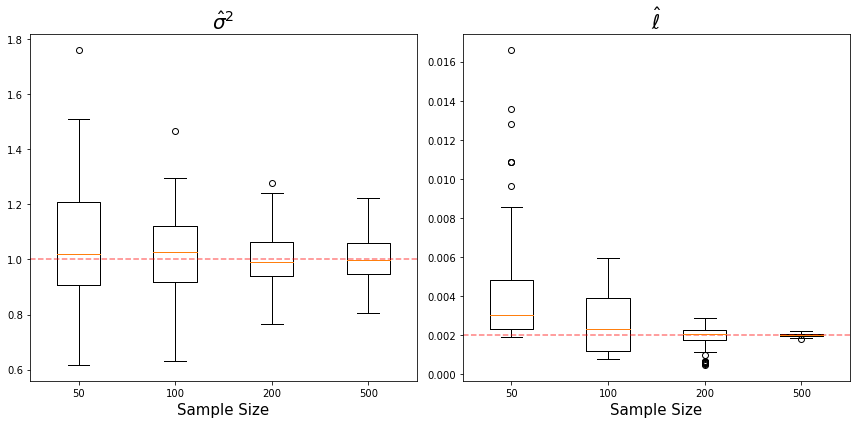

In [19]:
# Generate plots
param_estimates = np.load('./results/RBF-simulation.npy').tolist()
param_names = [r'$\hat{\sigma}^2$', r'$\hat{\ell}$']
generate_boxplots(param_estimates, true_params, sample_sizes, param_names)

In [7]:
    def check(n, params):
        kernel = construct_RBF_kernel(params)
        print(kernel)
        x = np.linspace(0, 1, n)
        K = kernel([[p] for p in x])
        eigvals = np.sort(np.linalg.eigvals(K))
        print(np.linalg.cond(K))
        print(eigvals)
    
    n = 100
    params = [1, 1/300]
    check(n, params)

1**2 * RBF(length_scale=0.00333)
1.0413748793335253
[0.97973188 0.97976129 0.97981029 0.97987882 0.97996681 0.98007419
 0.98020084 0.98034665 0.98051147 0.98069514 0.98089749 0.98111832
 0.98135742 0.98161455 0.98188947 0.98218191 0.98249159 0.9828182
 0.98316144 0.98352097 0.98389644 0.98428749 0.98469374 0.9851148
 0.98555026 0.98599969 0.98646268 0.98693876 0.98742747 0.98792835
 0.98844091 0.98896464 0.98949906 0.99004363 0.99059784 0.99116114
 0.991733   0.99231285 0.99290014 0.99349429 0.99409474 0.99470091
 0.9953122  0.99592802 0.99654779 0.99717089 0.99779674 0.99842471
 0.99905421 0.99968462 1.00031534 1.00094575 1.00157525 1.00220322
 1.00282907 1.00345217 1.00407194 1.00468776 1.00529906 1.00590522
 1.00650567 1.00709983 1.00768712 1.00826698 1.00883883 1.00940214
 1.00995634 1.01050092 1.01103534 1.01155908 1.01207164 1.01257252
 1.01306124 1.01353732 1.0140003  1.01444974 1.01488521 1.01530627
 1.01571252 1.01610357 1.01647905 1.01683858 1.01718182 1.01750844
 1.01781811 